# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Zihao

Last Name: Chen

Student ID: 915490404

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
import requests_cache
requests_cache.install_cache('cache')

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import time

In [2]:
key = "8qoqda6SXdEbuQ4CXLZT1kvdLPvw12QJDrzcjRvx"

In [3]:
def ndb_search(terms="",ds=''):
    """
    A function of searching the USDA Food Composition Databases
    Details:https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md
    
    arg:
    terms: the terms you want to search
    ds:the database. There are two database(options) in the USDA:"Branded Food Products" and "Standard Reference"
    """
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key":key,
        "q":terms,
        "ds":ds,
        "format":"json" ,
    }).json()
    #for 0 items, return an empty list,
    #by the way, the original search will return a error message. 
    try:
        resp = response['list']['item']
    except KeyError :
        resp=[]
    return resp

In [4]:
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

In [5]:
ndb_search("not exist")

[]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [6]:
#I check the difference between the two database, the Branded Food Products and the Standard Reference
#the unbranded one should belong to Standard Reference instead of Branded Food Products
#Adding the "raw" to the "item" will decrease the results to what we want as shown below.
print(pd.DataFrame(ndb_search("plums"+" "+"raw",'Standard Reference')))
#take the first one.
pd.DataFrame(ndb_search("plums",'Standard Reference'))["ndbno"][0]

   ds                    group                        name  ndbno  offset
0  SR  Fruits and Fruit Juices                  Plums, raw  09279       0
1  SR  Fruits and Fruit Juices  Carissa, (natal-plum), raw  09061       1
2  SR  Fruits and Fruit Juices  Java-plum, (jambolan), raw  09145       2
3  SR  Fruits and Fruit Juices          Sapote, mamey, raw  09314       3


'09279'

In [7]:
fresh = pd.read_csv("fresh.csv")

In [8]:
fresh["NDB"]=None
for i in fresh.index:
    time.sleep(0.2)#to be polite
    try:
        fresh.iloc[i,7]=ndb_search(fresh.iloc[i,5]+" "+"raw",'Standard Reference')[0]["ndbno"]
    except:IndexError

In [9]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [10]:
def ndb_report(ndbno):
    """
    NDB number as an argument and return the list of nutrients for the food.
    Details:https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md
    
    arg:
        ndbno: A list of up to 50 NDB numbers
    """
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key":key,
        "ndbno":ndbno,
        "format":"json" ,
    }).json()
    res = response['foods'][0]['food']['nutrients']
    return res

In [11]:
#instead of showing a list, I prefer to show the DataFrame here
#ndb_report("09279")[0] is as what in the example. 
#Some difference between the example and what i got, i think it is because of the updates of the api.
# for example, i got the derivation column
pd.DataFrame(ndb_report("09279"))

,derivation,group,measures,name,nutrient_id,unit,value
0,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Water,255,g,87.23
1,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Energy,208,kcal,46
2,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Protein,203,g,0.70
3,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Total lipid (fat),204,g,0.28
4,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Carbohydrate, by difference",205,g,11.42
5,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Fiber, total dietary",291,g,1.4
6,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Sugars, total",269,g,9.92
7,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Calcium, Ca",301,mg,6
8,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Iron, Fe",303,mg,0.17
9,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Magnesium, Mg",304,mg,7


__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [12]:
fresh["kcal"],fresh["Protein"]=None,None
for i in fresh.index:
    time.sleep(0.1)#to be polite
    if pd.notnull(fresh.iloc[i,7]):
        report=pd.DataFrame(ndb_report(fresh.iloc[i,7]))
        fresh.iloc[i,8]=float(report["value"][report["name"].str.contains('Energy')])
        fresh.iloc[i,9]=float(report["value"][report["name"].str.contains('Protein')])
        #for more nutrition analysis, just add more columns as shown above. I am not an expert in nutrition.
        #so i just discussed the kilocalories and the protein.

In [13]:
#according to the website, the kcal and Protein variable tells us about "100 g equivalent value of the nutrient" which is nutrient_per_100g
#1 pound = 453.59237 grams
#price_per_lb / yield / 4.5359237=price_per_100g(after yield)
# nutrient_per_100g / price_per_100g  = nutrient / price 
#the greater the "nutrient / price" , the better combination of price, yield and nutrition

fresh["kcal/price"]=fresh.kcal/(fresh.price_per_lb/fresh["yield"]/4.5359237)
fresh["Protein/price"]=fresh.Protein/(fresh.price_per_lb/fresh["yield"]/4.5359237)

In [14]:
fresh.sort_values(by="kcal/price",ascending=False)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB,kcal,Protein,kcal/price,Protein/price
14,Fresh1,0.566983,0.640000,0.330693,0.292965,bananas,fruit,09040,89,1.09,455.686,5.58087
31,Fresh1,0.564320,0.811301,0.264555,0.184017,potatoes,vegetables,11362,58,2.57,378.225,16.7593
38,Fresh1,0.918897,0.811301,0.440925,0.499400,sweet_potatoes,vegetables,11507,86,1.57,344.413,6.28754
42,Fresh1,2.235874,0.740753,0.319670,0.964886,avocados,vegetables,09038,167,1.96,250.962,2.94542
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,30,0.61,212.231,4.31537
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,50,0.54,184.281,1.99023
18,Fresh1,1.461575,0.900000,0.363763,0.590740,pears,fruit,09252,57,0.36,159.207,1.00552
28,Fresh1,1.038107,0.900000,0.352740,0.406868,onions,vegetables,11282,40,1.1,157.299,4.32572
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,49,1.04,156.737,3.32667
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,34,0.84,146.775,3.62621


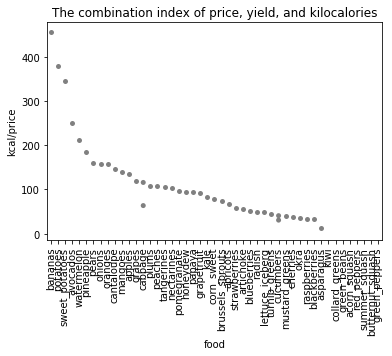

['bananas', 'potatoes'] is the best two combination of price, yield, and kilocalories


In [15]:
data_sort=fresh.sort_values(by="kcal/price",ascending=False)
value=data_sort["kcal/price"]
index=data_sort["food"]

dot=sns.stripplot(x = index, y = value , color='grey')
dot.set(title = "The combination index of price, yield, and kilocalories",
        xlabel = "food", ylabel = "kcal/price")
dot.set_xticklabels(dot.get_xticklabels(),rotation = 90)
plt.show(dot)

print("%s is the best two combination of price, yield, and kilocalories"%list(data_sort["food"])[0:2])

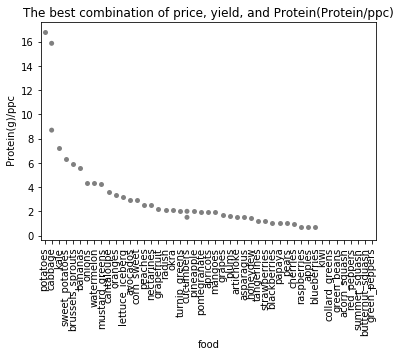

['potatoes', 'cabbage'] is the best two combination of price, yield and Protein


In [16]:
data_sort=fresh.sort_values(by="Protein/price",ascending=False)
value=data_sort["Protein/price"]
index=data_sort["food"]

dot=sns.stripplot(x = index, y = value , color='grey')
dot.set(title = "The best combination of price, yield, and Protein(Protein/ppc)",
        xlabel = "food", ylabel = " Protein(g)/ppc")
dot.set_xticklabels(dot.get_xticklabels(),rotation = 90)
plt.show(dot)

print("%s is the best two combination of price, yield and Protein"%list(data_sort["food"])[0:2])

According to the results above, potatoes is the best combination of price, yield and nutrient

This is why in Economics, potatoes will be shown up when talking about Giffen Good concepts.

https://www.investopedia.com/terms/g/giffen-good.asp

*Another example offered of a Giffen good is that of the Irish potato famine of 1845-49. During the famine, as the price of potatoes rose, impoverished consumers had little money left for more nutritious but expensive food items like meat (the income effect). So even though they would have preferred to buy more meat and fewer potatoes (the substitution effect), the lack of money led them to buy more potatoes and less meat. But doubt has been cast on this example because the usual response to scarcity of a good like potatoes would drive prices higher. *

